Media erro relativo soma truncamento:  0.0007278239221021169
Desvio padrão soma truncamento:  3.374036575246006e-10
Media erro relativo soma arredondamento:  0.000308625422924445
Desvio padrão soma arredondamento:  1.9128989341150718e-10
Media erro relativo multiplicação truncamento:  0.753840742650455
Desvio padrão multiplicação truncamento:  1.1445799094242764e-08
Media erro relativo multiplicação arredondamento:  0.7505299813843154
Desvio padrão multiplicação arredondamento:  (1.7070057772914908e-25+2.7877519926234645e-09j)
Media erro relativo subtração truncamento:  0.7556548707483961
Desvio padrão subtração arredondamento:  1.4523855365528112e-08
Media erro relativo subtração arredondamento:  0.8411690661572598
Desvio padrão subtração arredondamento:  (6.948882458454915e-25+1.134838626662479e-08j)
Media erro relativo total truncamento:  0.7556548707483961
Desvio padrão total truncamento:  1.4523855365528112e-08
Media erro relativo total arredondamento:  0.8411690661572598
Desvio p

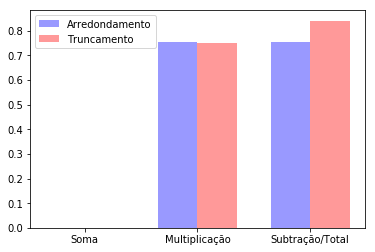

In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

def convertToDecimal(t, exp):
  exp=int(exp)
  if (exp>0):
    t=list(t)
    t.insert(exp, '.')
    t=''.join(t)
    if (t[-1]=='.'): t.replace('.', '')
    t=float(t)
    return t
  elif (exp<0):
    exp=exp*(-1)
    t='0'*exp+t
    t=float('0.'+t)
    return t  
  else:
    t=float('0.' + t)
    return t

def truncation(num, exp, lim):

  if (int(num.split('.')[0])>0):

    integerSize=str(len(num.split('.')[0]))
    fractional=num.split('.')[0] + num.split('.')[1] 
    if (len(fractional)>lim): fractional=fractional[:lim] 
    
    t=fractional
    if(int(integerSize)>exp): fractional='0.' + fractional + '*10**+' + str(exp)
    else: fractional='0.' + fractional + '*10**+' + integerSize

  else:

    fractional=num.split('.')[1] 

    i=0
    while (True):
      if (fractional[i]=='0'): i+=1
      else: break
    fractional=fractional.replace('0', '', i)

    if (len(fractional)>lim): fractional=fractional[:lim]

    t=fractional
    if (i>=exp): fractional='0.' + fractional + '*10**-' + str(exp)
    elif (i==0): fractional='0.' + fractional + '*10**+0'
    else: fractional='0.' + fractional + '*10**-' + str(i)

  return [fractional, t, fractional[-2]+fractional[-1]]

def rounding(num, exp, lim):
  floor=False
  ceil=False
  if (int(num.split('.')[0])>0):

    integerSize=str(len(num.split('.')[0]))
  
    fractional=num.split('.')[0] + num.split('.')[1]

    if (len(fractional)>lim): 
      if (int(fractional[lim])>5): ceil=True
      elif (int(fractional[lim])<5): floor=True
      fractional=fractional[:lim]

    if (ceil): fractional=str(int(fractional)+1) 
    if (floor): fractional=str(int(fractional))  
    
    t=fractional
    if(int(integerSize)>exp): fractional='0.' + fractional + '*10**+' + str(exp)
    else: fractional='0.' + fractional + '*10**+' + integerSize
  else:

    fractional=num.split('.')[1] 

    i=0
    while (True):
      if (fractional[i]=='0'): i+=1
      else: break
    fractional=fractional.replace('0', '', i)

    if (len(fractional)>lim): 
      if (int(fractional[lim])>5): ceil=True  
      elif (int(fractional[lim])<5): floor=True
      fractional=fractional[:lim]

    if (ceil): fractional=str(int(fractional)+1) 
    if (floor): fractional=str(int(fractional)) 

    t=fractional   
    if (i>=exp): fractional='0.' + fractional + '*10**-' + str(exp)
    elif (i==0): fractional='0.' + fractional + '*10**+0'
    else: fractional='0.' + fractional + '*10**-' + str(i)
  return [fractional, t, fractional[-2]+fractional[-1]]

def erroSoma(x, y):
  errRelX=0
  errRelY=0
  soma=x+y
  somaAproxTrunc=truncation(str(soma), 3, 3)
  somaAproxTrunc[2]=int(somaAproxTrunc[2])
  somaAproxTrunc=convertToDecimal(somaAproxTrunc[1], somaAproxTrunc[2])
  errRelSomaTrunc=(soma-somaAproxTrunc)/somaAproxTrunc

  somaAproxArredond=rounding(str(soma), 3, 3)
  somaAproxArredond[2]=int(somaAproxArredond[2])
  somaAproxArredond=convertToDecimal(somaAproxArredond[1], somaAproxArredond[2])
  errRelSomaArredond=(soma-somaAproxArredond)/somaAproxArredond

  if (errRelSomaArredond<0): errRelSomaArredond=-(errRelSomaArredond)

  return [somaAproxTrunc, errRelSomaTrunc, somaAproxArredond, errRelSomaArredond]

def erroMult(z, somaAproxTrunc, errRelSomaTrunc, somaAproxArredond, errRelSomaArredond):
  errRelZ=0
  multTrunc=z*somaAproxTrunc
  multAproxTrunc=truncation(str(multTrunc), 3, 3)
  multAproxTrunc[2]=int(multAproxTrunc[2])
  multAproxTrunc=convertToDecimal(multAproxTrunc[1], multAproxTrunc[2])
  errRelMultTrunc=((multTrunc-multAproxTrunc)/multAproxTrunc)
  if (errRelMultTrunc<0): errRelMultTrunc*=(-1)
  errRelMultTrunc+=errRelSomaTrunc

  multArredond=z*somaAproxArredond
  multAproxArredond=rounding(str(multArredond), 3, 3)
  multAproxArredond[2]=int(multAproxArredond[2])
  multAproxArredond=convertToDecimal(multAproxArredond[1], multAproxArredond[2])
  errRelMultArredond=((multArredond-multAproxArredond)/multAproxArredond)
  if (errRelMultArredond<0): errRelMultArredond*=(-1)
  errRelMultArredond+=errRelSomaArredond

  return [multAproxTrunc, errRelMultTrunc, multAproxArredond, errRelMultArredond]

def erroSub(t, multAproxTrunc, errRelMultTrunc, multAproxArredond, errRelMultArredond):
  erroRelT=0
  subTrunc=multAproxTrunc-t
  if (subTrunc<0): subTrunc*=(-1)
  subAproxTrunc=truncation(str(subTrunc), 3, 3)
  subAproxTrunc[2]=int(subAproxTrunc[2])
  subAproxTrunc=convertToDecimal(subAproxTrunc[1], subAproxTrunc[2])
  errRelSubTrunc=((subTrunc-subAproxTrunc)/subAproxTrunc)
  if (errRelMultTrunc<0): errRelMultTrunc*=(-1)
  errRelSubTrunc+=errRelMultTrunc

  subArredond=multAproxArredond-t
  if (subArredond<0): subArredond*=(-1)  
  subAproxArredond=rounding(str(subArredond), 3, 3)
  subAproxArredond[2]=int(subAproxArredond[2])
  subAproxArredond=convertToDecimal(subAproxArredond[1], subAproxArredond[2])
  errRelSubArredond=((subArredond-subAproxArredond)/subAproxArredond)
  if (errRelSubArredond<0): errRelSubArredond*=(-1)
  errRelSubArredond+=errRelMultArredond

  return [errRelSubTrunc, errRelSubArredond]

def desvioPadrao(arrayErros, media, tam):
    counter=0
    acc=0
    while(counter<100):
        acc+=(arrayErros[counter]-media)
        counter+=1
    dp=(acc/tam)**0.5
    return dp

def media():
  counter=1
  acc=0
  acc2=0
  acc3=0
  acc4=0
  acc5=0
  acc6=0

  errSomaTrunc=[]
  errSomaArredond=[]
  errMultTrunc=[]
  errMultArredond=[]
  errSubTrunc=[]
  errSubArredond=[]

  while(counter<=100):
    t1=str((random.randint(1,100)))
    t2=str((random.randint(1,100)))
    t3=str((random.randint(1,100)))
    t4=str((random.randint(1,100)))

    exp1=str((random.randint(-3,3)))
    exp2=str((random.randint(-3,3)))
    exp3=str((random.randint(-3,3)))
    exp4=str((random.randint(-3,3)))

    x='0.'+ t1 + '*10^' + exp1
    y='0.'+ t2 + '*10^' + exp2
    z='0.'+ t3 + '*10^' + exp3
    t='0.'+ t4 + '*10^' + exp4

    x=convertToDecimal(t1, exp1)
    y=convertToDecimal(t2, exp2)
    z=convertToDecimal(t3, exp3)
    t=convertToDecimal(t4, exp4)

    soma=erroSoma(x,y)
    acc+=soma[1]
    errSomaTrunc.append(soma[1])
    acc2+=soma[3]
    errSomaArredond.append(soma[3])
    mult=erroMult(z, soma[0], soma[1], soma[2], soma[3])
    acc3+=mult[1]
    errMultTrunc.append(mult[1])
    acc4+=mult[3]
    errMultArredond.append(mult[3])
    acc5+=(erroSub(t, mult[0], mult[1], mult[2], mult[3]))[0]
    errSubTrunc.append((erroSub(t, mult[0], mult[1], mult[2], mult[3]))[0])
    acc6+=(erroSub(t, mult[0], mult[1], mult[2], mult[3]))[1]
    errSubArredond.append((erroSub(t, mult[0], mult[1], mult[2], mult[3]))[1])
    counter+=1
  print('Media erro relativo soma truncamento: ', acc/100)
  print('Desvio padrão soma truncamento: ', desvioPadrao(errSomaTrunc, acc/100 ,100))
  print('Media erro relativo soma arredondamento: ', acc2/100)
  print('Desvio padrão soma arredondamento: ', desvioPadrao(errSomaArredond, acc2/100 ,100))
  print('Media erro relativo multiplicação truncamento: ', acc3/100)
  print('Desvio padrão multiplicação truncamento: ', desvioPadrao(errMultTrunc, acc3/100 ,100))
  print('Media erro relativo multiplicação arredondamento: ', acc4/100)
  print('Desvio padrão multiplicação arredondamento: ', desvioPadrao(errMultArredond, acc4/100 ,100))
  print('Media erro relativo subtração truncamento: ', acc5/100)
  print('Desvio padrão subtração arredondamento: ', desvioPadrao(errSubTrunc, acc5/100 ,100))
  print('Media erro relativo subtração arredondamento: ', acc6/100)
  print('Desvio padrão subtração arredondamento: ', desvioPadrao(errSubArredond, acc6/100 ,100))
  print('Media erro relativo total truncamento: ', acc5/100)
  print('Desvio padrão total truncamento: ', desvioPadrao(errSubTrunc, acc5/100 ,100))
  print('Media erro relativo total arredondamento: ', acc6/100)
  print('Desvio padrão total arredondamento: ', desvioPadrao(errSubTrunc, acc6/100 ,100))
  print('Gráfico Média:')

  operations = 3

  arredondamentosData = [acc/100, acc3/100, acc5/100]
  truncamentosData = [acc2/100, acc4/100, acc6/100]

  fig, ax = plt.subplots()

  index = np.arange(operations)
  bar_width = 0.35

  opacity = 0.4
  rects1 = ax.bar(index, arredondamentosData, bar_width,
            alpha=opacity, color='b',
            label='Arredondamento')

  rects2 = ax.bar(index + bar_width, truncamentosData, bar_width,
            alpha=opacity, color='r',
            label='Truncamento')

  ax.set_xticks(index + bar_width / 2)
  ax.set_xticklabels(('Soma', 'Multiplicação', 'Subtração/Total'))



  plt.legend()
  plt.show()
  

media()